# Sleep spindle detection 

by Davide Gamba, Nathan Margni and Federico Weithaler

## Signal Processing

### Signal extraction

The first excerpt edf was not working because of a metadata issue. We copied metadata from second excerpt on the first to make it work.

In [1]:
import numpy as np
import mne
import os
from os.path import dirname, join as pjoin

In [2]:
def load_data(data_path):
    data = []
    for i in range(8):
        # read edf file
        file_name = pjoin(data_path, f"excerpt{i+1}.edf")
        
        edf_file = mne.io.read_raw_edf(file_name)
        print(type(edf_file))
        if not edf_file:
            print(f"CZ-A1 channel not found in {file_name}")
            edf_file = mne.io.read_raw_edf(file_name, preload=True, include=["C3-A1"])
        
        data.append(edf_file)
    return data

Loading all edf files CZ-A1 channel if present, C3-A1 otherwise

In [3]:
data_path = "data"

excerpt_list = []
for i in range(8):
    # read edf file
    file_name = pjoin(data_path, f"excerpt{i+1}.edf")
    
    edf_file = mne.io.read_raw_edf(file_name, preload=True, include=["CZ-A1"])
    if not edf_file.info["ch_names"]:
        print(f"CZ-A1 channel not found in {file_name}")
        edf_file = mne.io.read_raw_edf(file_name, preload=True, include=["C3-A1"])
    
    excerpt_list.append(edf_file)


Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2613187310.py:8: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  edf_file = mne.io.read_raw_edf(file_name, preload=True, include=["CZ-A1"])


Reading 0 ... 204799  =      0.000 ...  1023.995 secs...
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89999  =      0.000 ...  1799.980 secs...
CZ-A1 channel not found in data\excerpt3.edf
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89999  =      0.000 ...  1799.980 secs...
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\bi

Manually changing the sfreq in the first excerpt, since we modified the metadata of the file

In [4]:
# change the info frequency of first excerpt to 100 Hz since we manually modified the file
excerpt_1 = excerpt_list[0]
info = mne.create_info(excerpt_1.ch_names, 100, excerpt_1.get_channel_types())

new_excerpt_1 = mne.io.RawArray(excerpt_1.get_data(), info)
excerpt_list[0] = new_excerpt_1

Creating RawArray with float64 data, n_channels=1, n_times=204800
    Range : 0 ... 204799 =      0.000 ...  2047.990 secs
Ready.


Checking which channel has been included for each excerpt

In [5]:
for excert in excerpt_list:
    print(excert.info["ch_names"])

['CZ-A1']
['CZ-A1']
['C3-A1']
['CZ-A1']
['CZ-A1']
['CZ-A1']
['CZ-A1']
['CZ-A1']


Loading all annotations, visual 1 and 2 and automatic.

In [6]:
# read annotation from txt file called "Visual_scoring1_excerptn.txt"
filenames_list1 = []
for i in range(8):
    file_name = pjoin(data_path, f"Visual_scoring1_excerpt{i+1}.txt")
    filenames_list1.append(file_name)


# rea# read text from the files
annotations1_list = []
for filename in filenames_list1:
    x_list, y_list = [], []
    with open(filename, 'r') as file:
        header = file.readline()
        for line in file:
            values = line.split()
            x = float(values[0])
            y = float(values[1])
            x_list.append(x)
            y_list.append(y)
             
    annotations1_list.append([x_list, y_list])


# read annotation from txt file called "Visual_scoring2_excerptn.txt"
filenames_list2 = []
for i in range(6):
    file_name = pjoin(data_path, f"Visual_scoring2_excerpt{i+1}.txt")
    filenames_list2.append(file_name)

# read text from the files (annotations only until excerpt 6)
annotations2_list = []
for filename in filenames_list2:
    x_list, y_list = [], []
    with open(filename, 'r') as file:
        header = file.readline()
        for line in file:
            values = line.split()
            x = float(values[0])
            y = float(values[1])
            x_list.append(x)
            y_list.append(y)   
    annotations2_list.append([x_list, y_list])


# read annotation from txt file called "Automatic_detection_exerptn.txt"
filenames_list3 = []
for i in range(8):
    file_name = pjoin(data_path, f"Automatic_detection_excerpt{i+1}.txt")
    filenames_list3.append(file_name)

automatic_annotations_list = []
for filename in filenames_list3:
    x_list, y_list = [], []
    with open(filename, 'r') as file:
        header = file.readline()
        for line in file:
            values = line.split()
            x = float(values[0])
            y = float(values[1])
            x_list.append(x)
            y_list.append(y)
    automatic_annotations_list.append([x_list, y_list])


# moltiply all values of annotation x by 200
for annotation in annotations1_list:
    # moltiply all values in the list by 200
    annotation[0] = [x * 200 for x in annotation[0]]
    annotation[1] = [x * 200 for x in annotation[1]]

for annotation in annotations2_list:
    # moltiply all values in the list by 200
    annotation[0] = [x * 200 for x in annotation[0]]
    annotation[1] = [x * 200 for x in annotation[1]]


for annotation in automatic_annotations_list:
    # moltiply all values in the list by 200
    annotation[0] = [x * 200 for x in annotation[0]]
    annotation[1] = [x * 200 for x in annotation[1]]



### Signal Filtering

In [7]:
def filter_signals(raw, l_freq, h_freq):
    raw_copy = raw.copy()  
  
    raw_filtered = raw_copy.filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')
    return raw_filtered


In [8]:
# filter all signals
filtered_excerpt_list = []
for i in range(8):
    filtered_excerpt_list.append(filter_signals(excerpt_list[i], 0.3, 24))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 24 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 24.00 Hz
- Upper transition bandwidth: 6.00 Hz (-6 dB cutoff frequency: 27.00 Hz)
- Filter length: 1101 samples (11.010 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 24 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [9]:
for excertp in excerpt_list:
    print(excertp.info['sfreq'])

100.0
200.0
50.0
200.0
200.0
200.0
200.0
200.0


We can see that Patients 1 and 3 present a different frequency, namely 100Hz and 50Hz, we will resample all of them to 200Hz

In [10]:
# list of frequencies
sfreq_list = [100, 200, 50, 200, 200, 200, 200, 200]

Resample all signals to 200 Hz

In [11]:
#import resample form scipy
from scipy.signal import resample

resampled_excerpt_list = excerpt_list.copy()
new_sfreq = 200

for i in range(len(sfreq_list)):
    sfreq = sfreq_list[i]
    if sfreq != 200:
        edf_file = excerpt_list[i]
        print(edf_file.get_data().shape)
        new_n_samples = int(edf_file._data.shape[1] * (new_sfreq / sfreq))
        resampled_data = resample(edf_file._data, new_n_samples, axis=1)
        # recreate the edf file with the resapled data and new sfreq info
        info = mne.create_info(edf_file.ch_names, new_sfreq, edf_file.get_channel_types())
        resampled_raw = mne.io.RawArray(resampled_data, info)


        print(resampled_raw.get_data().shape)
        resampled_excerpt_list[i] = resampled_raw
    



(1, 204800)
Creating RawArray with float64 data, n_channels=1, n_times=409600
    Range : 0 ... 409599 =      0.000 ...  2047.995 secs
Ready.
(1, 409600)
(1, 90000)
Creating RawArray with float64 data, n_channels=1, n_times=360000
    Range : 0 ... 359999 =      0.000 ...  1799.995 secs
Ready.
(1, 360000)


In [12]:
resampled_arrays = []

for excertp in resampled_excerpt_list:
    resampled_arrays.append(excertp.get_data()[0])

In [13]:
for i in range(len(resampled_arrays)):
    print(f"Lenght array of excerpt {i+1}:", resampled_arrays[i].shape[0])

Lenght array of excerpt 1: 409600
Lenght array of excerpt 2: 360000
Lenght array of excerpt 3: 360000
Lenght array of excerpt 4: 360000
Lenght array of excerpt 5: 360000
Lenght array of excerpt 6: 360000
Lenght array of excerpt 7: 360000
Lenght array of excerpt 8: 360000


## Feature extraction 

We will use this function to extract the features from the signal

In [14]:
from scipy.signal import hilbert
import numpy as np
import scipy.signal
import scipy.stats
import antropy as ent
import seaborn as sns
import matplotlib.pyplot as plt
import yasa
from scipy.integrate import simps

def compute_features(raw, start_time, end_time):
    # Select the time window
    start_sample = int(start_time)
    end_sample = int(end_time)
    data = raw[start_sample:end_sample]

    # select wider time window for pac and instantaneous frequency
    diff_time = end_time - start_time
    wider_start_sample = int(start_time - 200*2 + diff_time/2) # 1.75 seconds before
    wider_end_sample = int(end_time + 200*2 - diff_time/2) # 1.75 seconds after
    
    if wider_start_sample < 0:
        wider_start_sample = 0
        
    wider_data = raw[wider_start_sample:wider_end_sample]

    sample_entropy = ent.sample_entropy(data, order=2, metric='chebyshev')
    maximum = np.max(data)
    minimum = np.min(data)
    variance = np.var(data)
    std_dev = np.std(data)
    
    # Frequency-domain features
    f, psd = scipy.signal.welch(data, sfreq, nperseg=256)
    kurtosis = scipy.stats.kurtosis(psd)
    skewness = scipy.stats.skew(psd)
    power_peak = np.max(psd)
    power_ratio = np.sum(psd[np.logical_and(f >= 11, f <= 16)]) / np.sum(psd)
    analytic_signal = hilbert(wider_data)
    amplitude_envelope = np.mean(np.abs(analytic_signal))
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.mean((np.diff(instantaneous_phase) /
                            (2.0*np.pi) * 200))
    
    f, t, Sxx = scipy.signal.spectrogram(wider_data, fs=200)
    pac = np.sum(Sxx[11:17,:])/np.sum(Sxx)
    iqr = scipy.stats.iqr(psd)
    zero_crossing = np.sum(np.diff(np.sign(psd))) / (2 * len(psd))

    spectral_entropy = ent.spectral_entropy(data, sfreq, method='welch', normalize=True)
    autocorr_coeff = np.correlate(data, data, mode='full')[len(data)-1:] / np.max(np.correlate(data, data, mode='full'))
    activity = np.var(data)
    mobility = np.sqrt(np.var(np.diff(data)) / activity)
    complexity = (np.sqrt(np.var(np.diff(np.diff(data)))) / np.sqrt(np.var(np.diff(data)))) / mobility
    hjorth_parameters = {'activity': activity, 'mobility': mobility, 'complexity': complexity}
    teo = np.sum(np.square(data) - np.roll(data, -1)*np.roll(data, 1))
    peak_to_peak_amp = np.ptp(data)
    rms = np.sqrt(np.mean(np.square(data)))
    cv = scipy.stats.variation(data)
    
    
    
    features = {
        'sample_entropy': sample_entropy,
        'maximum': maximum,
        'minimum': minimum,
        'variance': variance,
        'std_dev': std_dev,
        'kurtosis': kurtosis,
        'skewness': skewness,
        'power_peak': power_peak,
        'power_ratio': power_ratio,
        'inst_freq': instantaneous_frequency,
        'ampl_envelope': amplitude_envelope,
        'pac': pac,
        'iqr': iqr,
        'zero_crossing': zero_crossing,

        'spectral_entropy': spectral_entropy, # new features
        'autocorr_coeff': autocorr_coeff[0],
        'hjorth_parameters': hjorth_parameters,
        'teo': teo,
        'peak_to_peak_amp': peak_to_peak_amp,
        'rms': rms,
        'cv': cv,
    
        
    }
    
    return features



c:\Installed_programs\Conda\envs\bio_faraci2\lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [15]:
# Example usage:
sfreq =200
start_time = 0  # Replace with the start time of the sleep spindle event
end_time = start_time + 100  # 0.5 seconds window
features = compute_features(resampled_arrays[0], start_time, end_time)
data = load_data(data_path)
print(type(data[0]))

Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<class 'mne.io.edf.edf.RawEDF'>
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<class 'mne.io.edf.edf.RawEDF'>
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<class 'mne.io.edf.edf.RawEDF'>
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<class 'mne.io.edf.edf.RawEDF'>
Extracting E

c:\Installed_programs\Conda\envs\bio_faraci2\lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\190981394.py:7: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  edf_file = mne.io.read_raw_edf(file_name)
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\190981394.py:7: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo, event_pneumo_aut
  edf_file = mne.io.read_raw_edf(file_name)
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\190981394.py:7: RuntimeWarning: Physical range is not defined in following channels:
VAB, NAF2P-A1, PCPAP, POS, FP2-A1, O2-A1, CZ2-A1, event_pneumo, event_pneumo_aut
  edf_file = mne.io.read_raw_edf(file_name)
C:\Users\

### Create intervals of spindles from annotations

We use the retrieved annotations in order to classify each interval into weather it has or does not have spindles in them. We use different thresholds to determine weather a window is or not a spindle.

In [16]:
# from list with x and duration create a list of intervals
def create_intervals(x_list, duration_list):
    intervals_list = []
    for i in range(len(x_list)):
        intervals_list.append([x_list[i], x_list[i] + duration_list[i]])
    return intervals_list


In [17]:
intervals_list1 = []
for annotation in annotations1_list:
    intervals_list1.append(create_intervals(annotation[0], annotation[1]))


intervals_list2 = []
for annotation in annotations2_list:
    intervals_list2.append(create_intervals(annotation[0], annotation[1]))

automatic_intervals_list = []
for annotation in automatic_annotations_list:
    automatic_intervals_list.append(create_intervals(annotation[0], annotation[1]))



all_intervals_list = [intervals_list1, intervals_list2, automatic_intervals_list]

We visualize the signals from the excerpt. As you can see, excerpt 1 presents a profoundly different structure to all of the other signals. It was not clear to us as to why, but this discrepancy ultimately prompted us to remove this patiewnt from our training and testing data, with a resulting improvement of the performances of our models.

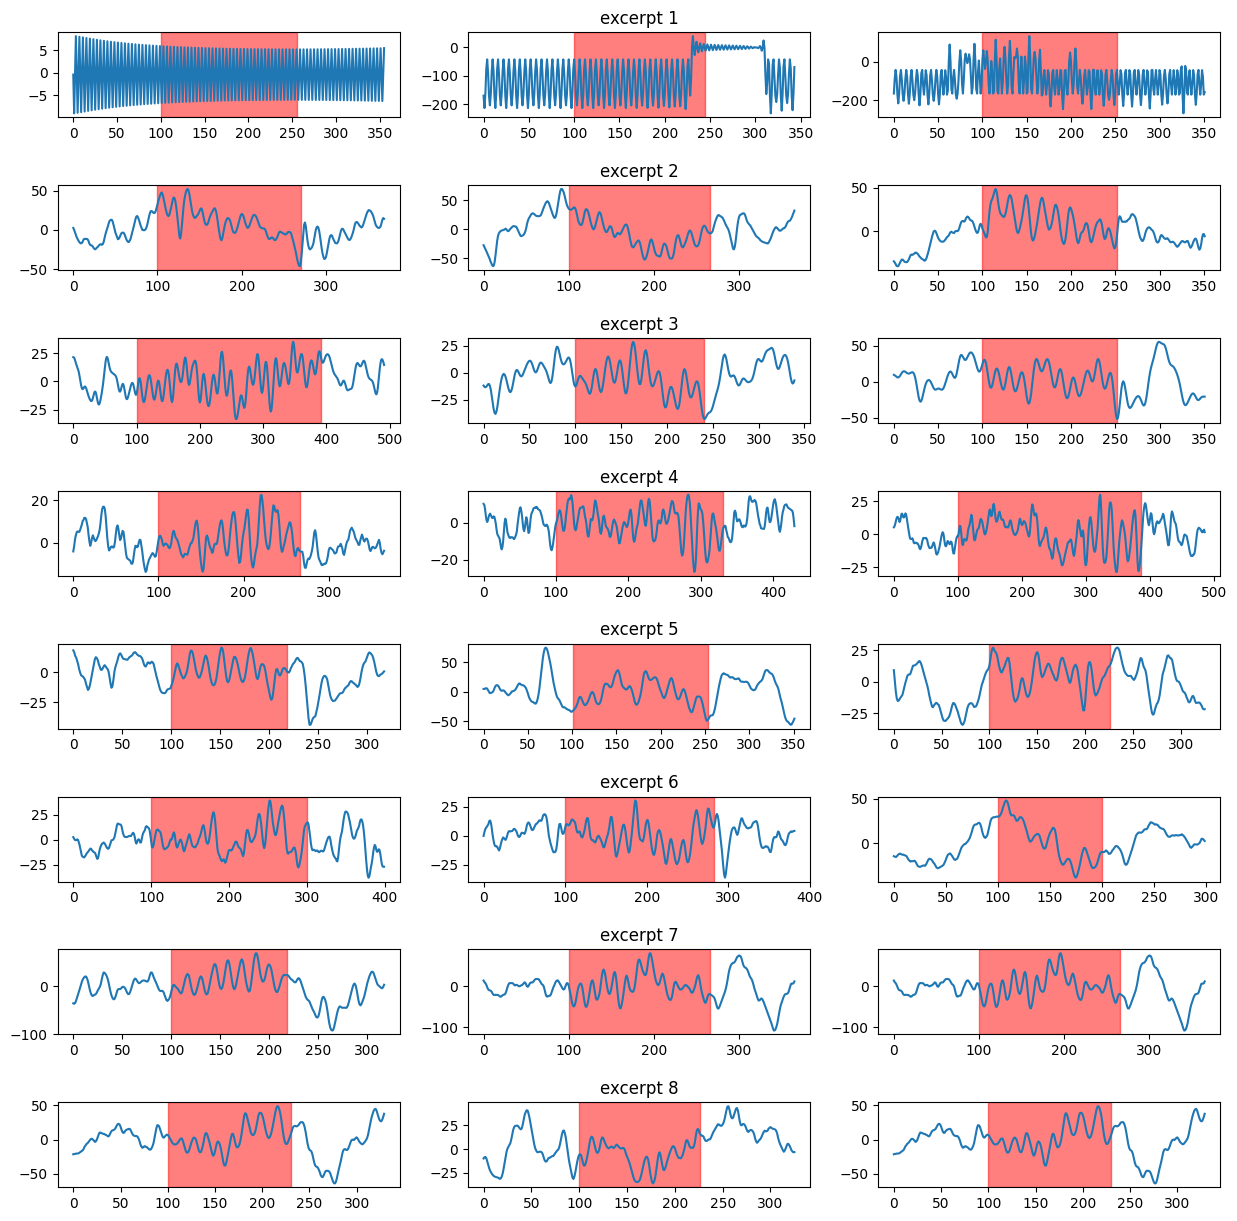

In [18]:
import random 

spindle_interval = intervals_list1[1][3]

# plot 10 seconds of resampled array around the spindle interval 

def plot_10_seconds_around_spindle(resampled_array, spindle_interval, axis):
    start_time = int(spindle_interval[0] - 100)
    end_time = int(spindle_interval[1] + 100)
    axis.plot(resampled_array[start_time:end_time])
    # color the line of the resampled array where the spindle is
    axis.axvspan(spindle_interval[0] - start_time, spindle_interval[1] - start_time, color='red', alpha=0.5)
    
   


# plot 3 intervals for each excerpt

# create axis for subplots
fig, axs = plt.subplots(8, 3, figsize=(15, 15))

for row in range(1, 9):
    excerpt = resampled_arrays[row-1]
    for col in range(3):
    # random pick a spindle interval
        spindle_interval = random.choice(intervals_list1[row-1])
        plot_10_seconds_around_spindle(excerpt, spindle_interval, axs[row-1, col])
        # add title to the row of subplots
        if col == 1:
            axs[row-1, col].set_title('excerpt {}'.format(row))
        # add space between rows of subplots
        if col == 2:
            fig.subplots_adjust(hspace=0.8)




We use this function to create the labels for the various datasets. We emply 3 different ways to understand weather a window contains a spindle. once the labels are computed, we add them to the dataframe along with the features we extracted previously.

In [20]:
import pandas as pd


def create_dataframe(resampled_arrays, all_intervals_list, label_opt= 1):
    # for each 0.5*200 samples compute features and add label 1 if it is in the interval
    # and 0 if it is not in the interval
    matrix = list()
    for i in range(len(resampled_arrays)):
        excerpt = resampled_arrays[i]

        # option 1: label 1 if the spindle completely covers the time between start_time and end_time    
        for start_time in range(0, len(excerpt)-100, 100): # 100 samples = 0.5 seconds
            end_time = start_time + 100
            features = compute_features(excerpt, start_time, end_time)
            if label_opt == 1:
                labels = []
                for intervals in all_intervals_list:
                    if i >= len(intervals):
                        label = np.nan
                    else:
                        label = 0
                        for interval in intervals[i]:
                            # Check if the interval completely covers the time between start_time and end_time
                            if interval[0] <= start_time and interval[1] >= end_time:
                                label = 1
                    labels.append(label)

                
            # option 2: label 1 if the spindle covers at least 50% of the time between start_time and end_time
            elif label_opt == 2:
    
                labels = []
                total_duration = end_time - start_time

                for intervals in all_intervals_list:
                    if i >= len(intervals):
                        label = np.nan
                    else:
                        label = 0
                        for interval in intervals[i]:
                            overlap_start = max(start_time, interval[0])
                            overlap_end = min(end_time, interval[1])

                            # Calculate the duration of the overlap
                            overlap_duration = max(0, overlap_end - overlap_start)

                            # Check if the overlap is at least 50% of the total duration
                            if overlap_duration / total_duration >= 0.5:
                                label = 1
                    labels.append(label)
        
            # option 3: label 1 if the spindle overlaps with the time between start_time and end_time
            else:
                labels = []
                for intervals in all_intervals_list:
                    if i >= len(intervals):
                        label = np.nan
                    else:
                        label = 0
                        for interval in intervals[i]:
                            if start_time >= interval[0] and start_time <= interval[1]:
                                label = 1
                            elif end_time >= interval[0] and end_time <= interval[1]:
                                label = 1
                            elif start_time <= interval[0] and end_time >= interval[1]:
                                label = 1
                    labels.append(label)
            
        
            # create array with features
            new_array = np.array([features['sample_entropy'], features['maximum'], features['minimum'], features['variance'], features['std_dev'], 
                                    features['kurtosis'], features['skewness'], features['power_peak'],
                                        features['power_ratio'], features['inst_freq'], features['ampl_envelope'], features['pac'], 
                                            features['iqr'], features['zero_crossing'], features['spectral_entropy'], features['autocorr_coeff'],
                                                features['hjorth_parameters']['activity'],
                                                    features['teo'], features['peak_to_peak_amp'],
                                                        features['rms'], features['cv'],
                                            start_time, int(i+1),  labels[0], labels[1], labels[2]])
            matrix.append(new_array)
        print(f"excerpt {i+1} done")        
    return np.array(matrix)

In [21]:
matrix = create_dataframe(resampled_arrays, all_intervals_list, label_opt= 1)

excerpt 1 done
excerpt 2 done
excerpt 3 done
excerpt 4 done
excerpt 5 done
excerpt 6 done
excerpt 7 done
excerpt 8 done


In [22]:
# create dataframe from matrix
columns = [k for k in features.keys()]
columns.append('start_time')
columns.append('patient_id')
columns.append('label1')
columns.append('label2')
columns.append('label3')
df = pd.DataFrame(data=matrix, columns=columns)

# set all nan values to 0 
df = df.fillna(0)
df

,sample_entropy,maximum,minimum,variance,std_dev,kurtosis,skewness,power_peak,power_ratio,inst_freq,...,hjorth_parameters,teo,peak_to_peak_amp,rms,cv,start_time,patient_id,label1,label2,label3
0,0.039583,38.153843,-211.715478,6489.079704,80.554824,15.803947,3.884455,965.857551,2.067910e-02,0.389628,...,6489.079704,326029.562384,249.869321,108.275306,-1.113411,0.0,1.0,0.0,0.0,0.0
1,-0.000000,-42.011633,-209.274058,3472.585305,58.928646,24.836431,5.067533,1006.721400,2.071364e-07,0.434649,...,3472.585305,518872.106900,167.262425,139.740072,-0.465078,100.0,1.0,0.0,0.0,0.0
2,-0.000000,-42.011633,-209.349716,3523.424486,59.358441,24.836301,5.067518,1006.723966,2.107253e-07,0.594964,...,3523.424486,533714.536255,167.338083,138.866413,-0.472822,200.0,1.0,0.0,0.0,0.0
3,-0.000000,-42.011633,-209.583814,3467.691224,58.887106,24.837564,5.067626,1006.746876,2.474787e-07,0.499849,...,3467.691224,517410.966916,167.572182,137.456927,-0.474115,300.0,1.0,0.0,0.0,0.0
4,0.056195,67.415264,-211.803584,6738.368257,82.087565,11.475473,3.490101,818.275306,1.998994e-02,0.743624,...,6738.368257,404915.166403,279.218848,112.954834,-1.057947,400.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29283,0.771216,45.992366,-45.144493,364.765328,19.098831,17.302461,4.278607,86.287544,5.098714e-02,6.235536,...,364.765328,6922.909641,91.136859,19.103600,-44.743252,359400.0,8.0,0.0,0.0,0.0
29284,0.950192,31.597601,-30.689749,179.924368,13.413589,9.145242,3.060578,30.001612,2.680130e-01,5.969352,...,179.924368,6876.011655,62.287350,15.940207,1.557554,359500.0,8.0,0.0,0.0,0.0
29285,1.358123,35.586150,-48.063431,288.922449,16.997719,8.458515,2.946779,31.930461,5.255907e-02,4.262644,...,288.922449,17731.550682,83.649582,17.332232,-5.015886,359600.0,8.0,0.0,0.0,0.0
29286,0.819899,39.064885,-84.140313,750.216997,27.390089,28.946374,5.242354,187.766299,2.010476e-02,4.616672,...,750.216997,12824.102584,123.205198,32.723664,-1.529669,359700.0,8.0,0.0,0.0,0.0


Here we remove Patient 1 from our data


In [23]:
df = df[df['patient_id'] != 1]

### Add The Yasa Features to the DF

In [24]:
import yasa

def get_yasa_dfs(method='interpolate'):
    dfs_with_yasa = []
    for i in range(2, len(excerpt_list)+1):
        edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
        try:
            yasa_f = yasa.SleepStaging(edf_file, eeg_name='CZ-A1')
        except:
            yasa_f = yasa.SleepStaging(edf_file.resample(sfreq=200), eeg_name='C3-A1')
        yasa_df = yasa_f.get_features()
        yasa_df['Time'] =  pd.to_timedelta(np.arange(0, len(yasa_df)) * 30, unit="s")
        yasa_df.set_index('Time', inplace=True)
        yasa_df_resampled = yasa_df.resample('0.5S').asfreq().interpolate(method='linear')
        yasa_df_resampled.reset_index(inplace=True, drop=True)
        df_to_concat = df[df['patient_id'] == i]
        df_to_concat.reset_index(inplace=True, drop=True)
        df_to_concat = pd.concat([df_to_concat, yasa_df_resampled], axis=1)
        if method == 'drop':
            df_to_concat = df_to_concat.dropna()
        elif method == 'interpolate':
            df_to_concat = df_to_concat.interpolate(method='linear')
        dfs_with_yasa.append(df_to_concat)
    return dfs_with_yasa

In [25]:
yasa_dfs = get_yasa_dfs(method='interpolate')

yasa_df = pd.concat(yasa_dfs)

Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo, event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Physical range is not defined in following channels:
VAB, NAF2P-A1, PCPAP, POS, FP2-A1, O2-A1, CZ2-A1, event_pneumo, event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Physical range is not defined in following channels:
PCPAP, event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Physical range is not defined in following channels:
PCPAP
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))


Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Physical range is not defined in following channels:
VTH, VAB, NAF2P-A1, NAF1, PCPAP, FP2-A1, O2-A1, CZ2-A1, event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Scaling factor is not defined in following channels:
PHONO
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Physical range is not defined in following channels:
PHONO, PCPAP, POS, FP2-A1, O2-A1
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))


Extracting EDF parameters from d:\SUPSI\school\third_year\secondsemester\subjects\biomedical_far\Final_project\data\excerpt8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo, event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\2760544306.py:6: RuntimeWarning: Physical range is not defined in following channels:
NAF2P-A1, NAF1, PHONO, PCPAP, POS, event_pneumo, event_pneumo_aut
  edf_file =  mne.io.read_raw_edf(pjoin("data", f"excerpt{i}.edf"))


### Generate Labels

Here we further manipulate the lables according to how the different experts scored the signals. We use intersection, union and union between automatic scoring and expert 2.

In [26]:
def generate_labels(df):
    # create all labels column that is 1 when all labels are 1 and 0 otherwise
    df['all_labels'] = df['label1'] + df['label2'] + df['label3']
    df['all_labels'] = df['all_labels'].apply(lambda x: 1 if x == 3 else 0)

    # create all labels (1 and 3) that is 1 when label 1 and 3 are 1 and 0 otherwise
    df['all_labels_1_3'] = df['label1'] + df['label3']
    df['all_labels_1_3'] = df['all_labels_1_3'].apply(lambda x: 1 if x == 2 else 0)

    # create one label column that is 1 when at least one label is 1 and 0 otherwise
    df['union_label'] = df['label1'] + df['label2'] + df['label3']
    df['union_label'] = df['union_label'].apply(lambda x: 1 if x >= 1 else 0)
    
    return df

In [27]:
df = generate_labels(df)

C:\Users\natha\AppData\Local\Temp\ipykernel_31692\542845532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_labels'] = df['label1'] + df['label2'] + df['label3']
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\542845532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_labels'] = df['all_labels'].apply(lambda x: 1 if x == 3 else 0)
C:\Users\natha\AppData\Local\Temp\ipykernel_31692\542845532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Here we generate the labels also for the yasa dataframe

In [28]:
yasa_df = generate_labels(yasa_df)

We visualize how much of the data has been labeld as spindels with the different union and intersection operations.

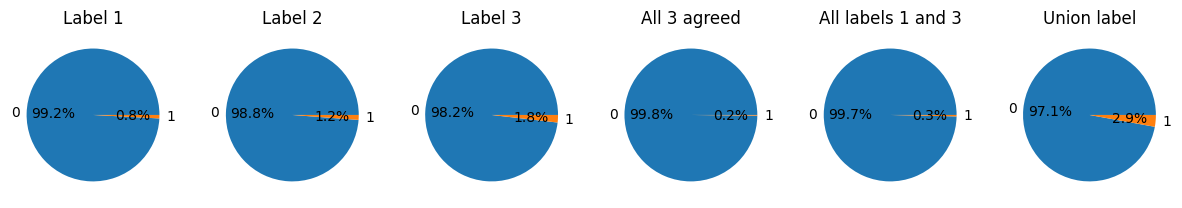

In [29]:
# plot piecharts with proportions of labels
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
axs[0].pie(df['label1'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
axs[0].set_title('Label 1')
axs[1].pie(df['label2'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
axs[1].set_title('Label 2')
axs[2].pie(df['label3'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
axs[2].set_title('Label 3')
axs[3].pie(df['all_labels'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
axs[3].set_title('All 3 agreed')
axs[4].pie(df['all_labels_1_3'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
axs[4].set_title('All labels 1 and 3')
axs[5].pie(df['union_label'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
axs[5].set_title('Union label')

plt.show()

In [30]:
# create a df table with the number of labels in each patient and for each label and union of labels
df_table = pd.DataFrame(columns=['patient_id', 'label1', 'label2', 'label3', 'all_labels', 'all_labels_1_3', 'union_label'])
for i in range(2, len(excerpt_list)+1):
    df_table.loc[i-1] = [i, df[df['patient_id'] == i]['label1'].sum(), df[df['patient_id'] == i]['label2'].sum(), df[df['patient_id'] == i]['label3'].sum(), 
                         df[df['patient_id'] == i]['all_labels'].sum(), df[df['patient_id'] == i]['all_labels_1_3'].sum(), df[df['patient_id'] == i]['union_label'].sum()]
# convert to int all values of df_table
df_table = df_table.astype(int)
df_table.set_index('patient_id', inplace=True)
df_table

,label1,label2,label3,all_labels,all_labels_1_3,union_label
patient_id,,,,,,
2,35,53,94,11,20,124
3,4,48,45,2,3,70
4,53,25,44,1,6,105
5,29,86,69,16,19,126
6,40,88,78,11,20,137
7,10,0,23,0,4,29
8,39,0,106,0,16,129


In [31]:
# decide which label to use, call it label and remove the others
label = 'union_label'
df["label"] = df[label]
df = df.drop(['label1', 'label2', 'label3', 'all_labels', 'all_labels_1_3', 'union_label'], axis=1)


C:\Users\natha\AppData\Local\Temp\ipykernel_31692\1722582621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df[label]


In [32]:
yasa_df["label"] = yasa_df[label]
yasa_df = yasa_df.drop(['label1', 'label2', 'label3','all_labels', 'all_labels_1_3', 'union_label'], axis=1)

In [33]:
def tts_by_patient(data: pd.DataFrame, test_patients: list = [1]):
        
    test_data = data.loc[data["patient_id"].isin(test_patients)]
    train_data = data.loc[~data["patient_id"].isin(test_patients)]
    
    y_train = train_data['label']
    X_train = train_data.drop(['label', 'patient_id'], axis=1)
    
    y_test = test_data['label']
    X_test = test_data.drop(['label', 'patient_id'], axis=1)
    
    return X_train, X_test, y_train, y_test
    
    

Remove last patient to use as final test 

In [34]:
# create df with only patient id 7 and remove it from df
df_8 = df[df['patient_id'] == 8]
df = df[df['patient_id'] != 8]

#also from yasa_df
yasa_df_8 = yasa_df[yasa_df['patient_id'] == 8]
yasa_df = yasa_df[yasa_df['patient_id'] != 8]

## Models

In [41]:
# create function to evaluate model 
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


def evaluate_model(y_test, y_pred):
    return {'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)}

### Logistic regression

In [191]:
# train logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


log_reg = LogisticRegression()


#### Logreg with cross validation 


In [192]:

def cross_val(model, scaling=True, random_oversampling=True, df=df):
    scores = []
    for i in range(2, 8):
        X_train, X_test, y_train, y_test = tts_by_patient(df, test_patients=[i])
        if scaling:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        if random_oversampling:
            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)
       
       
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(evaluate_model(y_test, y_pred))
        print(f"training of split {i} done")



    scores = pd.DataFrame(scores, columns=['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'confusion_matrix'])
    print("Scores for  model:")
    print(f'accuracy: {scores["accuracy"].mean()}')
    print(f'precision: {scores["precision"].mean()}')
    print(f'recall: {scores["recall"].mean()}')
    print(f'f1_score: {scores["f1"].mean()}')
    print(f'roc_auc: {scores["roc_auc"].mean()}')
    return scores


In [193]:
scores = cross_val(log_reg, random_oversampling=False)

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.9765675650643697
precision: 0.6399270482603816
recall: 0.33706473294498923
f1_score: 0.4163772499539666
roc_auc: 0.6662316034816981


### Knearest neighbors 

In [194]:
# train knearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

    

#### knearest neighboor cross validation

In [195]:
scores = cross_val(knn)

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.9465592294155784
precision: 0.30698067573554194
recall: 0.6538451367003774
f1_score: 0.3926557464714473
roc_auc: 0.8048617252666938


### Random forest 


In [196]:
# train random forest 
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = tts_by_patient(df, test_patients=[1, 7])

# oversample  the train set
sm = RandomOverSampler(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# evaluate model
y_pred = rf.predict(X_test)
scores = evaluate_model(y_test, y_pred)

print("Scores for random forest model:")
for k, v in scores.items():
    print(f'{k}: {v}')



Scores for random forest model:
accuracy: 0.9830508474576272
precision: 0.2647058823529412
recall: 0.6206896551724138
f1: 0.3711340206185567
roc_auc: 0.8033420264657588
confusion_matrix: [[3520   50]
 [  11   18]]


#### Feature importance

<Axes: >

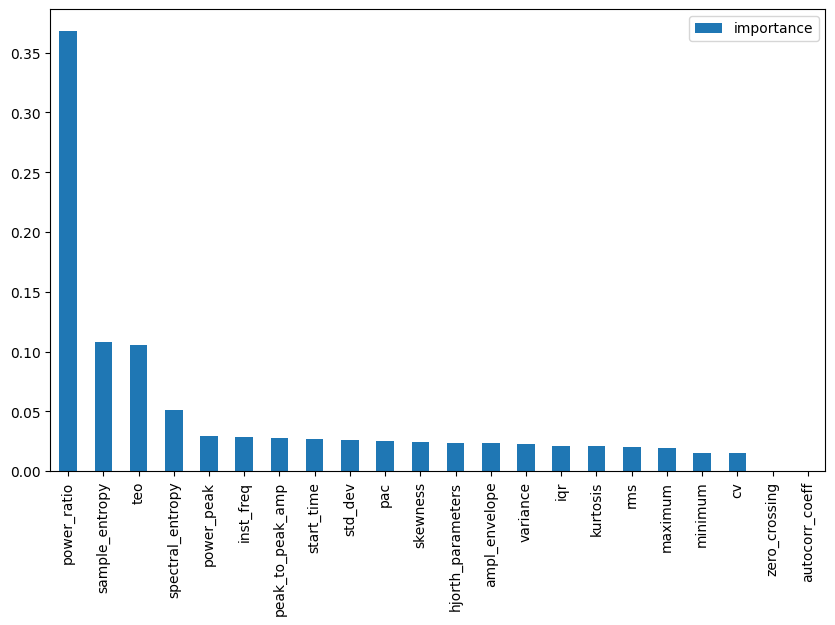

In [197]:
# plot feature importance
feature_importances = pd.DataFrame(rf.feature_importances_)
feature_importances.index = X_train.columns
feature_importances.columns = ['importance']

feature_importances.sort_values(by='importance', ascending=False).plot(kind='bar', figsize=(10, 6))

#### Random forest cross validation 

In [199]:
scores = cross_val(rf, scaling=False)

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.9774011299435029
precision: 0.6765033537802417
recall: 0.391023092295593
f1_score: 0.4473902381432164
roc_auc: 0.6930522828621678


#### Random forest  with added yasa features

In [200]:

X_train, X_test, y_train, y_test = tts_by_patient(yasa_df, test_patients=[1, 7])

sm = RandomOverSampler(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# evaluate model
y_pred = rf.predict(X_test)
scores = evaluate_model(y_test, y_pred)

print("Scores for random forest model:")
for k, v in scores.items():
    print(f'{k}: {v}')


Scores for random forest model:
accuracy: 0.9891636565712698
precision: 0.2222222222222222
recall: 0.13793103448275862
f1: 0.1702127659574468
roc_auc: 0.5670047329276539
confusion_matrix: [[3556   14]
 [  25    4]]


#### Feature importance with yasa features

<Axes: >

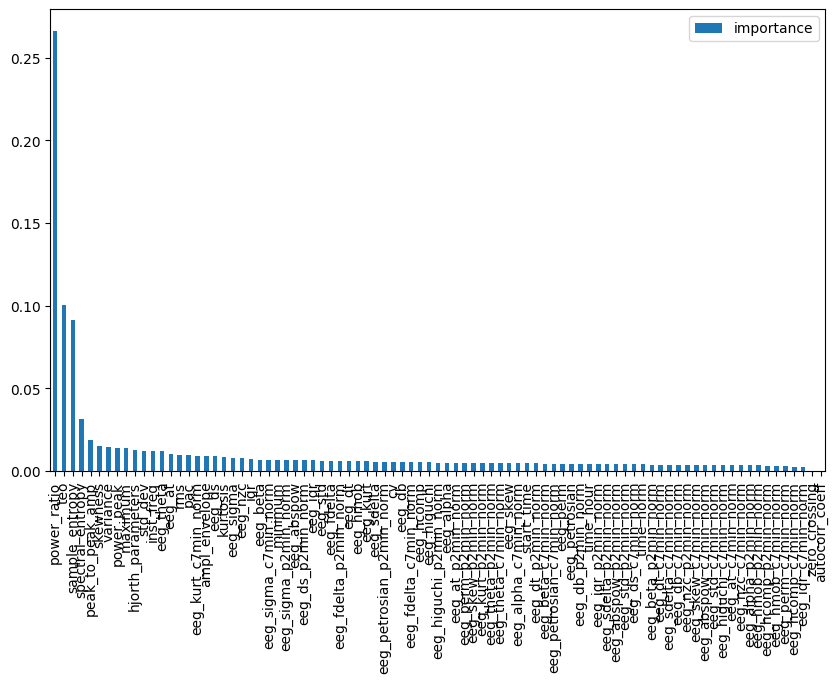

In [201]:
# plot feature importance
feature_importances = pd.DataFrame(rf.feature_importances_)
feature_importances.index = X_train.columns
feature_importances.columns = ['importance']

feature_importances.sort_values(by='importance', ascending=False).plot(kind='bar', figsize=(10, 6))

#### Random forest with added yasa features and cross validation 

In [202]:
scores = cross_val(rf, scaling=False, df= yasa_df)

training of split 2 done
training of split 3 done


c:\Installed_programs\Conda\envs\bio_faraci2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.9754561452255257
precision: 0.6431565656565656
recall: 0.15317254112468584
f1_score: 0.21240453449550126
roc_auc: 0.5757551082207751


### Balanced random forest cross validation 

In [203]:
import warnings
warnings.filterwarnings('ignore', '.*`sklearn.utils.parallel`.*')
warnings.filterwarnings('ignore', '.*`sklearn.utils.parallel.delayed`.*')

In [204]:
from imblearn.ensemble import BalancedRandomForestClassifier


brf = BalancedRandomForestClassifier(n_estimators=200, random_state=0)


In [205]:
scores = cross_val(brf, scaling = False, random_oversampling=False)

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.8980272297860515
precision: 0.21178249422979314
recall: 0.8596115572656823
f1_score: 0.32628024480802187
roc_auc: 0.8795473765210616


### Balanced random forest cross validation and yasa features

In [206]:
scores = cross_val(brf, scaling = False, random_oversampling=False, df= yasa_df)

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.9175233861257758
precision: 0.2450709240015777
recall: 0.7465235137914839
f1_score: 0.34362152423031694
roc_auc: 0.8348396459757005


### SVC with cross val


In [207]:
# svc model 
from sklearn.svm import SVC

svc = SVC()
scores = cross_val(svc, scaling = True, random_oversampling=True, df= yasa_df)

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for  model:
accuracy: 0.9428544966194313
precision: 0.3141279316017534
recall: 0.6546303202015551
f1_score: 0.3808058415746427
roc_auc: 0.8033221498597055


### NN with class weights on imbalanced label

In [208]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation, Input, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
# import StandardScaler
from sklearn.preprocessing import StandardScaler



# train a neural network with weights on the labels with the correct proportion 
X_train, X_test, y_train, y_test = tts_by_patient(df, test_patients=[1, 5, 7])

# scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# compile the model with class weights
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])



#### Cross validation 

In [209]:
# do cross validation using everytime a different patient as test set with our function tts_by_patient
# and calculate the metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold

scores = []
for i in range(2, 8):
    X_train, X_test, y_train, y_test = tts_by_patient(df, test_patients=[i])
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    props = y_train.value_counts()
    props = props/props.sum()
    model.fit(X_train, y_train, epochs=10, batch_size=64, class_weight={0: 1-props[0], 1: 1-props[1]}, verbose=0)
    loss, accuracy, f1, precision, recall,  = model.evaluate(X_test, y_test, verbose=0)
    scores.append([accuracy, precision, recall, f1])
    print(f"training of split {i} done")

scores = pd.DataFrame(scores, columns=['accuracy', 'precision', 'recall', 'f1'])
print("Scores for NN model:")
print(f'accuracy: {scores["accuracy"].mean()}')
print(f'precision: {scores["precision"].mean()}')
print(f'recall: {scores["recall"].mean()}')
print(f'f1_score: {scores["f1"].mean()}')


training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for NN model:
accuracy: 0.8999722003936768
precision: 0.1654390295346578
recall: 0.36235776791969937
f1_score: 0.211290309826533


### Neural network with balanced label 

In [211]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# create model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])



#### Cross validation


In [212]:

scores = []
for i in range(2, 8):
    X_train, X_test, y_train, y_test = tts_by_patient(df, test_patients=[i])
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    sm = RandomOverSampler(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    props = y_train.value_counts()
    props = props/props.sum()
    model.fit(X_train, y_train, epochs=10, batch_size=64, class_weight={0: 1-props[0], 1: 1-props[1]}, verbose=0)
    loss, accuracy, f1, precision, recall,  = model.evaluate(X_test, y_test, verbose=0)
    scores.append([accuracy, precision, recall, f1])
    print(f"training of split {i} done")

scores = pd.DataFrame(scores, columns=['accuracy', 'precision', 'recall', 'f1'])
print("Scores for NN model:")
print(f'accuracy: {scores["accuracy"].mean()}')
print(f'precision: {scores["precision"].mean()}')
print(f'recall: {scores["recall"].mean()}')
print(f'f1_score: {scores["f1"].mean()}')

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for NN model:
accuracy: 0.9830971658229828
precision: 0.3025846282641093
recall: 0.30397877593835193
f1_score: 0.29363512992858887


### NN, balanced data and added yasa features

In [217]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation, Input, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# create model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dense(1, activation='sigmoid'))



# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

#### Cross validation

In [218]:

scores = []
for i in range(2, 8):
    X_train, X_test, y_train, y_test = tts_by_patient(yasa_df, test_patients=[i])
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    sm = RandomOverSampler(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    props = y_train.value_counts()
    props = props/props.sum()
    model.fit(X_train, y_train, epochs=10, batch_size=64, class_weight={0: 1-props[0], 1: 1-props[1]}, verbose=0)
    loss, accuracy, f1, precision, recall,  = model.evaluate(X_test, y_test, verbose=0)
    scores.append([accuracy, precision, recall, f1])
    print(f"training of split {i} done")

scores = pd.DataFrame(scores, columns=['accuracy', 'precision', 'recall', 'f1'])
print("Scores for NN model:")
print(f'accuracy: {scores["accuracy"].mean()}')
print(f'precision: {scores["precision"].mean()}')
print(f'recall: {scores["recall"].mean()}')
print(f'f1_score: {scores["f1"].mean()}')

training of split 2 done
training of split 3 done
training of split 4 done
training of split 5 done
training of split 6 done
training of split 7 done
Scores for NN model:
accuracy: 0.8941910862922668
precision: 0.1454942828665177
recall: 26.48344389597575
f1_score: 0.2887372511128585


### Test models on patient 8 (not used in cv)

#### Random forest

In [95]:
X_train, y_train = df.drop(columns=['label']), df['label']
X_test, y_test = df_8.drop(columns=['label']), df_8['label']

In [82]:
# oversample the data
sm = RandomOverSampler()
X_train, y_train = sm.fit_resample(X_train, y_train)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
# evaluate model
y_pred = rf.predict(X_test)
scores = evaluate_model(y_test, y_pred)

print("Scores for random forest model:")
for k, v in scores.items():
    print(f'{k}: {v}')

Scores for random forest model:
accuracy: 0.9658238399555432
precision: 0.6666666666666666
recall: 0.09302325581395349
f1: 0.16326530612244897
roc_auc: 0.5456470745928557
confusion_matrix: [[3464    6]
 [ 117   12]]


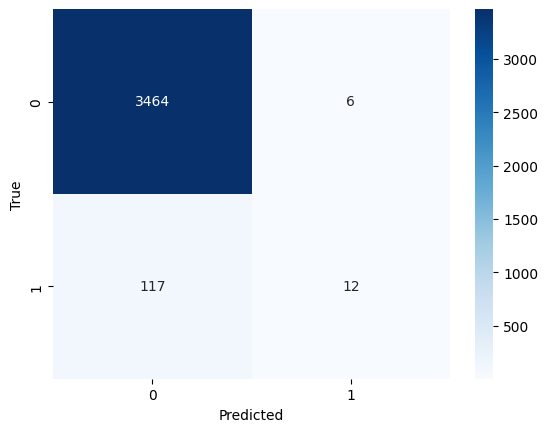

In [84]:
# plot confusion matrix
conf_matrix = scores['confusion_matrix']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Logistic regression 

In [87]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import logistic regression 
from sklearn.linear_model import LogisticRegression


# scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# evaluate model
y_pred = lr.predict(X_test)
scores = evaluate_model(y_test, y_pred)

print("Scores for logistic regression model:")
for k, v in scores.items():
    print(f'{k}: {v}')


Scores for logistic regression model:
accuracy: 0.8477354820783551
precision: 0.16903633491311215
recall: 0.8294573643410853
f1: 0.2808398950131233
roc_auc: 0.8389361749659318
confusion_matrix: [[2944  526]
 [  22  107]]


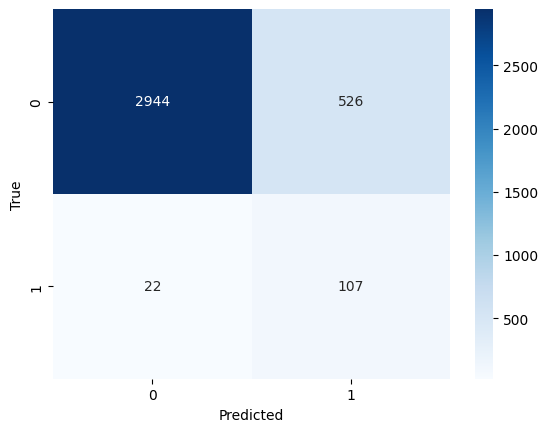

In [88]:
# plot confusion matrix
conf_matrix = scores['confusion_matrix']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### SVC


In [91]:
# import svc
from sklearn.svm import SVC

# train svc
svc = SVC()
svc.fit(X_train, y_train)

# evaluate model
y_pred = svc.predict(X_test)
scores = evaluate_model(y_test, y_pred)

print("Scores for SVC model:")
for k, v in scores.items():
    print(f'{k}: {v}')


Scores for SVC model:
accuracy: 0.9524868018894137
precision: 0.3581081081081081
recall: 0.4108527131782946
f1: 0.3826714801444043
roc_auc: 0.6917375957822309
confusion_matrix: [[3375   95]
 [  76   53]]


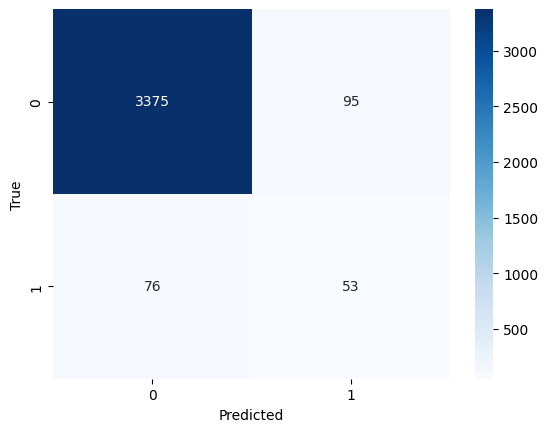

In [92]:
# plot confusion matrix
conf_matrix = scores['confusion_matrix']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()